In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
#import historical btc and eth 
train_btc= pd.read_csv('dataset.csv')
train_eth= pd.read_csv('Dataset_eth.csv')

In [3]:
train_btc["Date"]=pd.to_datetime(train_btc["Date"])
train_btc.set_index('Date', inplace=True)

In [4]:
train_eth["Date"]=pd.to_datetime(train_eth["Date"])
train_eth.set_index('Date', inplace=True)

In [5]:
train_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800
2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500
2014-11-19,373.895996,386.480988,373.895996,380.554993,380.554993,18931800
2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,25233200
2014-11-21,357.878998,357.878998,344.112000,350.847992,350.847992,29850100


In [6]:
train_btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
2023-09-07,25748.312500,26409.302734,25608.201172,26240.195313,26240.195313,11088307100
2023-09-08,26245.208984,26414.005859,25677.480469,25905.654297,25905.654297,10817356400
2023-09-09,25899.925781,25899.925781,25842.017578,25860.812500,25860.812500,9393588224


In [7]:
train_eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [8]:
from sklearn.model_selection import train_test_split
Dataset_train, Dataset_test = train_test_split(train_btc, test_size=0.2, shuffle=False)
Dataset_train_eth, Dataset_test_eth = train_test_split(train_eth, test_size=0.2, shuffle=False)

In [9]:
Dataset_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-30,57830.113281,59113.402344,56057.281250,57005.425781,57005.425781,36708594618
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307
2021-12-02,57217.371094,57349.234375,55895.132813,56477.816406,56477.816406,32379968686
2021-12-03,56509.164063,57482.167969,52496.585938,53598.246094,53598.246094,39789134215
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469


In [10]:
Dataset_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800
2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500
2014-11-19,373.895996,386.480988,373.895996,380.554993,380.554993,18931800
2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,25233200
2014-11-21,357.878998,357.878998,344.112000,350.847992,350.847992,29850100


In [11]:
Dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161
2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001
2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852
2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446
2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,29603577251


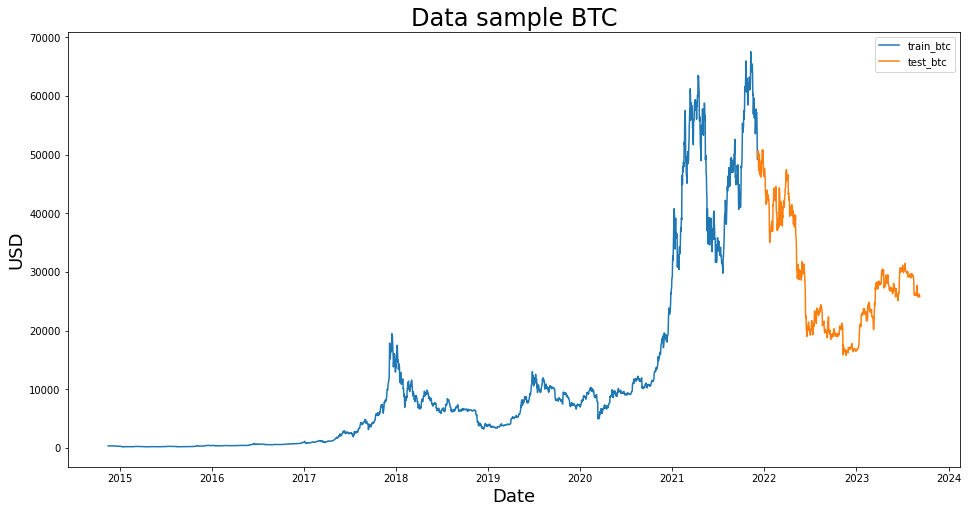

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data sample BTC', fontsize=24)
plt.plot(Dataset_train['Close'], label= "train_btc")
plt.plot(Dataset_test['Close'], label="test_btc")
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.legend()
plt.show()

In [15]:
Dataset_train_eth.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,1150.509766,1165.682739,1086.829956,1134.541016,1134.541016,16195518291
2022-07-06,1134.822266,1193.636719,1116.247559,1186.973999,1186.973999,15373536703
2022-07-07,1186.960938,1246.894897,1165.623169,1237.593384,1237.593384,14230795894
2022-07-08,1237.580322,1262.885742,1200.632202,1222.506226,1222.506226,16315929082
2022-07-09,1222.306885,1228.767944,1209.377563,1216.978271,1216.978271,8821353104


In [16]:
Dataset_test_eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-10,1216.904419,1216.904419,1157.175537,1168.401611,1168.401611,10984558039
2022-07-11,1168.139038,1169.193848,1095.002808,1097.236572,1097.236572,12064180410
2022-07-12,1097.259155,1097.259155,1038.135620,1038.191650,1038.191650,12583282453
2022-07-13,1038.186646,1113.587158,1019.220337,1113.587158,1113.587158,18302588147
2022-07-14,1113.515747,1202.953369,1077.405762,1191.526245,1191.526245,16688640823


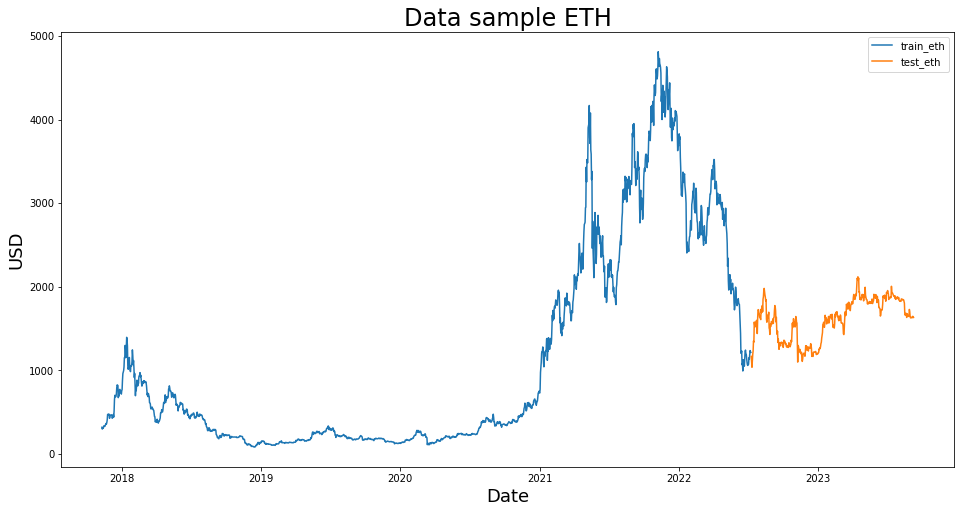

In [17]:
plt.figure(figsize=(16,8))
plt.title('Data sample ETH', fontsize=24)
plt.plot(Dataset_train_eth['Close'], label= "train_eth")
plt.plot(Dataset_test_eth['Close'], label="test_eth")
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.legend()
plt.show()

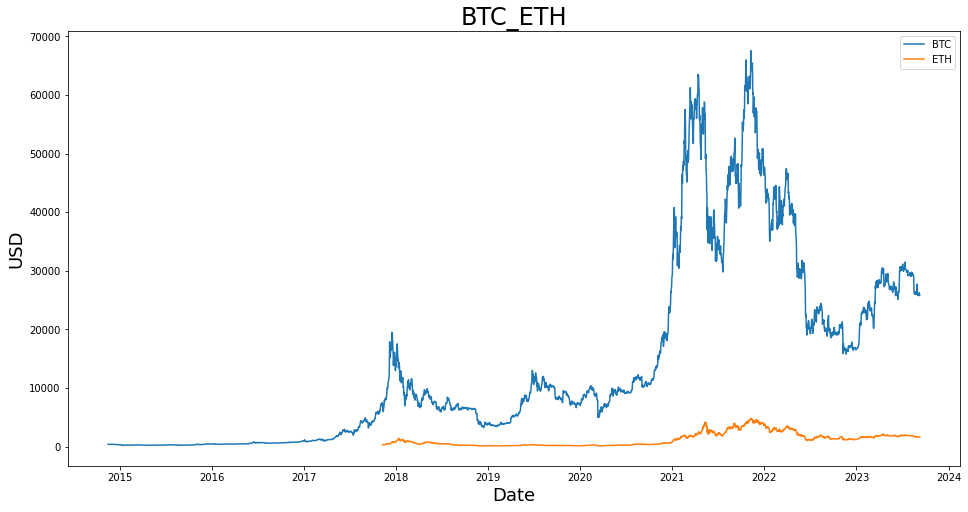

In [22]:
plt.figure(figsize=(16,8))
plt.title('BTC_ETH', fontsize=24)
plt.plot(train_btc['Close'], label= "BTC")
plt.plot(train_eth['Close'], label="ETH")
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.legend()
plt.show()

In [18]:
merged_data = pd.merge(train_btc, train_eth, on='Date', how='inner')
merged_data.rename(columns={'Close_x': 'BTC', 'Close_y': 'ETH'}, inplace=True)

In [19]:
correlation_matrix = merged_data[['BTC', 'ETH']].corr()

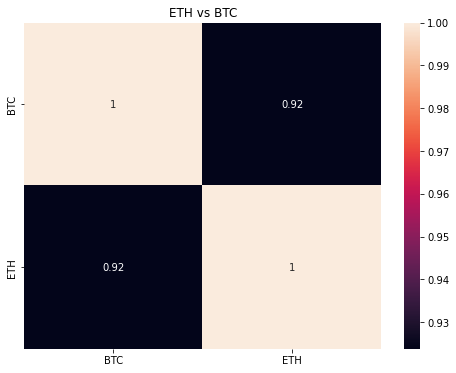

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('ETH vs BTC')
plt.show()

In [12]:
data = train_btc.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(data) * .8)
training_data_len

2576

In [ ]:
len(train_eth)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
BTC_training_scaled=sc.fit_transform(dataset)

In [8]:
train_data_BTC = BTC_training_scaled[0:training_data_len, :]

In [9]:
x_train_BTC = []
y_train_BTC = []
for i in range(80, len(train_data_BTC)):
    x_train_BTC.append(train_data_BTC[i-80:i, 0])
    y_train_BTC.append(train_data_BTC[i, 0])
x_train_BTC,y_train_BTC=np.array(x_train_BTC), np.array(y_train_BTC)

In [10]:
x_train_BTC = np.reshape(x_train_BTC, (x_train_BTC.shape[0],x_train_BTC.shape[1], 1))

In [11]:
test_data = BTC_training_scaled[training_data_len- 80: ,:]
X_test = []
y_test = dataset[training_data_len: ,:]
for i in range(80, len(test_data)):
  X_test.append(test_data[i-80 : i, 0])

In [12]:
X_test = np.array(X_test)

In [13]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
from tensorflow.keras import models, layers, Sequential

In [15]:
Reg_btc = Sequential()
Reg_btc.add(layers.LSTM(60, return_sequences=True, input_shape= (x_train_BTC.shape[1], 1)))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.LSTM(60, return_sequences=True))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.LSTM(60, return_sequences=True))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.LSTM(60))
Reg_btc.add(layers.Dropout(0.2))
Reg_btc.add(layers.Dense(1))

In [16]:
Reg_btc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 80, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                2

In [17]:
Reg_btc.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
history = Reg_btc.fit(x_train_BTC, y_train_BTC, batch_size=32,epochs=10)

Train on 2496 samples
Epoch 1/10
2496/2496 [==============================] - 33s 13ms/sample - loss: 0.0068
Epoch 2/10
2496/2496 [==============================] - 2s 876us/sample - loss: 0.0022
Epoch 3/10
2496/2496 [==============================] - 2s 921us/sample - loss: 0.0027
Epoch 4/10
2496/2496 [==============================] - 2s 865us/sample - loss: 0.0022
Epoch 5/10
2496/2496 [==============================] - 2s 919us/sample - loss: 0.0020
Epoch 6/10
2496/2496 [==============================] - 2s 923us/sample - loss: 0.0017
Epoch 7/10
2496/2496 [==============================] - 2s 907us/sample - loss: 0.0018
Epoch 8/10
2496/2496 [==============================] - 2s 820us/sample - loss: 0.0016
Epoch 9/10
2496/2496 [==============================] - 2s 808us/sample - loss: 0.0013
Epoch 10/10
2496/2496 [==============================] - 2s 823us/sample - loss: 0.0014


In [19]:
predictions_1 = Reg_btc.predict(X_test)
predictions_1 = sc.inverse_transform(predictions_1)
len(predictions_1)

643

In [20]:
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

654.6610765441293

/home/shegun/anaconda3/envs/GPU_Stations/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


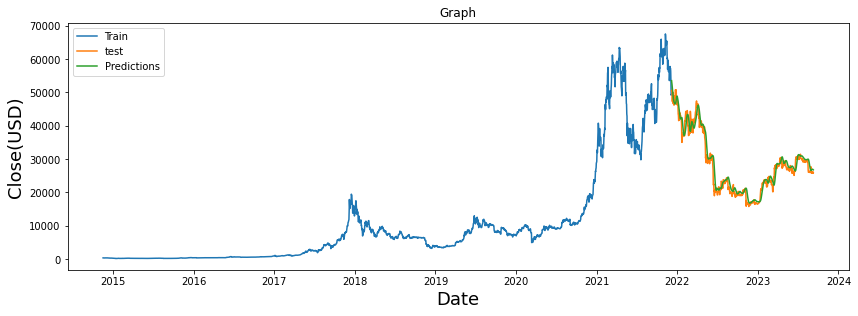

In [21]:
train = train_btc[:training_data_len]

valid_1 = train_btc[training_data_len:]
valid_1['Predictions'] = predictions_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Graph')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close(USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'test', 'Predictions'], loc='upper left')

In [22]:
pred = data[-80:].values
scaled = sc.fit_transform(pred)
today_btc = []
today_btc.append(scaled)
today_btc = np.array(today_btc)
today_btc = np.reshape(today_btc, (today_btc.shape[0], today_btc.shape[1], 1))
pred_price = Reg_btc.predict(today_btc)

In [23]:
pred_price = sc.inverse_transform(pred_price)
print(pred_price)

[[26154.578]]


In [24]:
Reg_btc.save("CryptoPaper")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CryptoPaper/assets
